In [1]:
# Importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import math
import pydot
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# preparing data
from sklearn.datasets import load_iris
from sklearn import datasets
# from sklearn.preprocessing import Imputer
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

#models for Classification
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression

#Evaluation metrics
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

#Dimensionality Reduction
from sklearn.decomposition import KernelPCA
from sklearn.decomposition import PCA
from sklearn.manifold import Isomap
from sklearn.manifold import LocallyLinearEmbedding
from sklearn.manifold import SpectralEmbedding
from sklearn.manifold import TSNE
from time import time

from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV

In [2]:
# Reading heart disease dataset
df = pd.read_csv('data_aggregated.csv')

In [3]:
print(df.shape)

(899, 76)


In [4]:
# to visualise al the columns in the dataframe
pd.pandas.set_option('display.max_columns', None)

In [5]:
df.head()

,Unnamed: 0,ccf,age,sex,painloc,painexer,relrest,pncaden,cp,trestbps,htn,chol,smoke,cigs,years,fbs,dm,famhist,restecg,ekgmo,ekgday,ekgyr,dig,prop,nitr,pro,diuretic,proto,thaldur,thaltime,met,thalach,thalrest,tpeakbps,tpeakbpd,dummy,trestbpd,exang,xhypo,oldpeak,slope,rldv5,rldv5e,ca,restckm,exerckm,restef,restwm,exeref,exerwm,thal,thalsev,thalpul,earlobe,cmo,cday,cyr,num,lmt,ladprox,laddist,diag,cxmain,ramus,om1,om2,rcaprox,rcadist,lvx1,lvx2,lvx3,lvx4,lvf,cathef,junk,name
0,0,0,63,1,1,1,1,-9,4,140,0,260,0,0,0,0,-9,0,1,1,22,85,0,0,1,0,0,5,4.5,-9.0,5.0,112,62,160,90,140,80,1,0,3.0,2,20,19,-9,-9,0,-9.0,-9,-9.0,-9,-9,-9,-9,-9,2,27,85,2,1,1,2,1,1,1,1,1,2,1,1,1,1,1,1,0.70,5.5,name
1,1,0,44,1,1,1,1,-9,4,130,0,209,0,20,10,0,1,0,1,7,23,84,0,0,1,0,0,5,2.5,-9.0,2.0,127,73,150,80,130,70,0,0,0.0,-9,-9,-9,-9,-9,-9,-9.0,-9,-9.0,-9,-9,-9,-9,-9,7,31,84,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0.50,-9.0,name
2,2,0,60,1,1,1,1,-9,4,132,1,218,1,40,40,0,-9,0,1,6,12,84,0,0,1,0,-9,5,6.0,-9.0,6.0,140,68,210,110,132,80,1,0,1.5,3,21,20,-9,-9,-9,-9.0,-9,-9.0,-9,-9,-9,-9,-9,7,30,84,2,1,1,1,1,2,1,2,1,2,1,1,1,1,7,2,0.52,4.1,name
3,3,0,55,1,1,1,1,-9,4,142,0,228,1,20,30,0,-9,0,1,9,7,84,0,0,0,0,0,5,8.2,8.0,10.0,149,60,195,100,142,80,1,0,2.5,1,10,12,-9,-9,-9,-9.0,-9,-9.0,-9,-9,-9,-9,-9,9,14,84,1,1,1,1,1,2,1,1,1,1,1,1,1,1,1,1,0.73,6.5,name
4,4,0,66,1,1,0,0,-9,3,110,1,213,0,20,8,1,1,1,2,4,25,86,1,1,1,0,0,5,7.5,7.5,7.0,99,66,155,60,110,70,1,0,1.3,2,15,16,-9,-9,-9,-9.0,-9,-9.0,-9,-9,-9,-9,-9,5,3,86,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0.73,8.0,name


In [6]:
#Dropping unnecessary columns
df_updated = df.drop(['name','junk','Unnamed: 0'],axis=1)

In [7]:
#first few instances of dataset
df_updated.head()

,ccf,age,sex,painloc,painexer,relrest,pncaden,cp,trestbps,htn,chol,smoke,cigs,years,fbs,dm,famhist,restecg,ekgmo,ekgday,ekgyr,dig,prop,nitr,pro,diuretic,proto,thaldur,thaltime,met,thalach,thalrest,tpeakbps,tpeakbpd,dummy,trestbpd,exang,xhypo,oldpeak,slope,rldv5,rldv5e,ca,restckm,exerckm,restef,restwm,exeref,exerwm,thal,thalsev,thalpul,earlobe,cmo,cday,cyr,num,lmt,ladprox,laddist,diag,cxmain,ramus,om1,om2,rcaprox,rcadist,lvx1,lvx2,lvx3,lvx4,lvf,cathef
0,0,63,1,1,1,1,-9,4,140,0,260,0,0,0,0,-9,0,1,1,22,85,0,0,1,0,0,5,4.5,-9.0,5.0,112,62,160,90,140,80,1,0,3.0,2,20,19,-9,-9,0,-9.0,-9,-9.0,-9,-9,-9,-9,-9,2,27,85,2,1,1,2,1,1,1,1,1,2,1,1,1,1,1,1,0.70
1,0,44,1,1,1,1,-9,4,130,0,209,0,20,10,0,1,0,1,7,23,84,0,0,1,0,0,5,2.5,-9.0,2.0,127,73,150,80,130,70,0,0,0.0,-9,-9,-9,-9,-9,-9,-9.0,-9,-9.0,-9,-9,-9,-9,-9,7,31,84,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0.50
2,0,60,1,1,1,1,-9,4,132,1,218,1,40,40,0,-9,0,1,6,12,84,0,0,1,0,-9,5,6.0,-9.0,6.0,140,68,210,110,132,80,1,0,1.5,3,21,20,-9,-9,-9,-9.0,-9,-9.0,-9,-9,-9,-9,-9,7,30,84,2,1,1,1,1,2,1,2,1,2,1,1,1,1,7,2,0.52
3,0,55,1,1,1,1,-9,4,142,0,228,1,20,30,0,-9,0,1,9,7,84,0,0,0,0,0,5,8.2,8.0,10.0,149,60,195,100,142,80,1,0,2.5,1,10,12,-9,-9,-9,-9.0,-9,-9.0,-9,-9,-9,-9,-9,9,14,84,1,1,1,1,1,2,1,1,1,1,1,1,1,1,1,1,0.73
4,0,66,1,1,0,0,-9,3,110,1,213,0,20,8,1,1,1,2,4,25,86,1,1,1,0,0,5,7.5,7.5,7.0,99,66,155,60,110,70,1,0,1.3,2,15,16,-9,-9,-9,-9.0,-9,-9.0,-9,-9,-9,-9,-9,5,3,86,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0.73


In [8]:
# Renaming num as target
df_updated.rename(columns={'num':'target'}, inplace=True)

In [9]:
#Types of data in the dataframe
df_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 899 entries, 0 to 898
Data columns (total 73 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ccf       899 non-null    int64  
 1   age       899 non-null    int64  
 2   sex       899 non-null    int64  
 3   painloc   899 non-null    int64  
 4   painexer  899 non-null    int64  
 5   relrest   899 non-null    int64  
 6   pncaden   899 non-null    int64  
 7   cp        899 non-null    int64  
 8   trestbps  899 non-null    int64  
 9   htn       899 non-null    int64  
 10  chol      899 non-null    int64  
 11  smoke     899 non-null    int64  
 12  cigs      899 non-null    int64  
 13  years     899 non-null    int64  
 14  fbs       899 non-null    int64  
 15  dm        899 non-null    int64  
 16  famhist   899 non-null    int64  
 17  restecg   899 non-null    int64  
 18  ekgmo     899 non-null    int64  
 19  ekgday    899 non-null    int64  
 20  ekgyr     899 non-null    int64 

In [10]:
df_updated.head()

,ccf,age,sex,painloc,painexer,relrest,pncaden,cp,trestbps,htn,chol,smoke,cigs,years,fbs,dm,famhist,restecg,ekgmo,ekgday,ekgyr,dig,prop,nitr,pro,diuretic,proto,thaldur,thaltime,met,thalach,thalrest,tpeakbps,tpeakbpd,dummy,trestbpd,exang,xhypo,oldpeak,slope,rldv5,rldv5e,ca,restckm,exerckm,restef,restwm,exeref,exerwm,thal,thalsev,thalpul,earlobe,cmo,cday,cyr,target,lmt,ladprox,laddist,diag,cxmain,ramus,om1,om2,rcaprox,rcadist,lvx1,lvx2,lvx3,lvx4,lvf,cathef
0,0,63,1,1,1,1,-9,4,140,0,260,0,0,0,0,-9,0,1,1,22,85,0,0,1,0,0,5,4.5,-9.0,5.0,112,62,160,90,140,80,1,0,3.0,2,20,19,-9,-9,0,-9.0,-9,-9.0,-9,-9,-9,-9,-9,2,27,85,2,1,1,2,1,1,1,1,1,2,1,1,1,1,1,1,0.70
1,0,44,1,1,1,1,-9,4,130,0,209,0,20,10,0,1,0,1,7,23,84,0,0,1,0,0,5,2.5,-9.0,2.0,127,73,150,80,130,70,0,0,0.0,-9,-9,-9,-9,-9,-9,-9.0,-9,-9.0,-9,-9,-9,-9,-9,7,31,84,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0.50
2,0,60,1,1,1,1,-9,4,132,1,218,1,40,40,0,-9,0,1,6,12,84,0,0,1,0,-9,5,6.0,-9.0,6.0,140,68,210,110,132,80,1,0,1.5,3,21,20,-9,-9,-9,-9.0,-9,-9.0,-9,-9,-9,-9,-9,7,30,84,2,1,1,1,1,2,1,2,1,2,1,1,1,1,7,2,0.52
3,0,55,1,1,1,1,-9,4,142,0,228,1,20,30,0,-9,0,1,9,7,84,0,0,0,0,0,5,8.2,8.0,10.0,149,60,195,100,142,80,1,0,2.5,1,10,12,-9,-9,-9,-9.0,-9,-9.0,-9,-9,-9,-9,-9,9,14,84,1,1,1,1,1,2,1,1,1,1,1,1,1,1,1,1,0.73
4,0,66,1,1,0,0,-9,3,110,1,213,0,20,8,1,1,1,2,4,25,86,1,1,1,0,0,5,7.5,7.5,7.0,99,66,155,60,110,70,1,0,1.3,2,15,16,-9,-9,-9,-9.0,-9,-9.0,-9,-9,-9,-9,-9,5,3,86,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0.73


In [12]:
df_updated[df_updated.columns[1:]].corr()['target'][:]

age         0.277798
sex         0.265602
painloc     0.122349
painexer    0.149683
relrest     0.137948
              ...   
lvx2       -0.056657
lvx3       -0.009070
lvx4        0.159599
lvf        -0.004141
cathef      0.187867
Name: target, Length: 72, dtype: float64

In [13]:
df_updated.isnull().sum()

ccf         0
age         0
sex         0
painloc     0
painexer    0
           ..
lvx2        0
lvx3        0
lvx4        0
lvf         0
cathef      0
Length: 73, dtype: int64

In [14]:
df_updated.isna().sum()

ccf         0
age         0
sex         0
painloc     0
painexer    0
           ..
lvx2        0
lvx3        0
lvx4        0
lvf         0
cathef      0
Length: 73, dtype: int64

In [15]:
# Evaluating the count of each chol values
df_updated['chol'].value_counts()

 0      172
-9       30
 254     10
 223      9
 220      9
       ... 
 251      1
 322      1
 393      1
 392      1
 603      1
Name: chol, Length: 214, dtype: int64

In [16]:
# printing the mean of cholestrol
print(df_updated['chol'].mean()) 

191.82647385984427


In [17]:
# replacing 0 values of chol with its mean
df_updated['chol'] = df_updated['chol'].replace(0, 191.82647385984427)

In [18]:
# Evaluating the count of each chol values
df_updated['chol'].value_counts()

 191.826474    172
-9.000000       30
 254.000000     10
 211.000000      9
 223.000000      9
              ... 
 407.000000      1
 327.000000      1
 313.000000      1
 518.000000      1
 190.000000      1
Name: chol, Length: 214, dtype: int64

In [19]:
# Evaluating the count of each target values
df_updated.target.value_counts()

0    404
1    191
3    132
2    130
4     42
Name: target, dtype: int64

In [20]:
# mapping 2,3,4 values to 1 in the target 
df_updated['target'] = df_updated.target.map({0:0, 1:1, 2:1, 3:1, 4:1})

In [21]:
# Evaluating the count of each target values
df_updated.target.value_counts()

1    495
0    404
Name: target, dtype: int64

In [22]:
df_updated.describe()

,ccf,age,sex,painloc,painexer,relrest,pncaden,cp,trestbps,htn,chol,smoke,cigs,years,fbs,dm,famhist,restecg,ekgmo,ekgday,ekgyr,dig,prop,nitr,pro,diuretic,proto,thaldur,thaltime,met,thalach,thalrest,tpeakbps,tpeakbpd,dummy,trestbpd,exang,xhypo,oldpeak,slope,rldv5,rldv5e,ca,restckm,exerckm,restef,restwm,exeref,exerwm,thal,thalsev,thalpul,earlobe,cmo,cday,cyr,target,lmt,ladprox,laddist,diag,cxmain,ramus,om1,om2,rcaprox,rcadist,lvx1,lvx2,lvx3,lvx4,lvf,cathef
count,899.0,899.000000,899.000000,899.000000,899.000000,899.000000,899.0,899.000000,899.000000,899.000000,899.000000,899.000000,899.000000,899.000000,899.000000,899.000000,899.000000,899.000000,899.000000,899.000000,899.000000,899.000000,899.000000,899.000000,899.000000,899.000000,899.000000,899.000000,899.000000,899.000000,899.000000,899.000000,899.000000,899.000000,899.000000,899.000000,899.000000,899.000000,899.000000,899.000000,899.000000,899.000000,899.000000,899.0,899.000000,899.000000,899.000000,899.000000,899.000000,899.000000,899.000000,899.000000,899.000000,899.000000,899.000000,899.000000,899.000000,899.000000,899.000000,899.000000,899.000000,899.000000,899.000000,899.000000,899.000000,899.000000,899.000000,899.000000,899.000000,899.000000,899.000000,899.000000,899.000000
mean,0.0,53.480534,0.790879,-2.191324,-2.416018,-2.404894,-9.0,3.253615,122.840934,0.117909,228.527423,-6.565072,5.982202,5.439377,-0.750834,-7.947720,-3.925473,0.581758,5.091212,14.022247,78.570634,-0.648498,-0.398220,-0.403782,-0.470523,-0.718576,31.340378,7.556062,-1.712013,13.506785,128.348165,70.224694,158.982202,80.545050,122.840934,77.451613,-0.183537,-0.556174,0.189766,-1.922136,3.337041,44.818687,-5.860957,-9.0,-8.989989,-8.703148,-8.665184,-8.978754,-8.948832,-2.419355,-7.512792,-8.545050,-8.989989,5.937709,15.738598,82.909900,0.550612,-1.834260,-1.383760,-1.556174,-5.130145,-1.394883,-5.264739,-1.890990,-5.338154,-1.476085,-1.883204,0.808676,0.820912,0.918799,1.387097,0.997775,3.669399
std,0.0,9.435894,0.406908,4.611051,4.472187,4.523955,0.0,0.928499,39.558930,1.873952,71.319570,4.162745,19.370716,18.219811,2.775607,3.063642,4.789326,0.921617,4.887888,10.298742,21.988362,2.396853,2.563544,2.438652,2.370938,2.642340,49.322581,5.602729,7.868678,30.054989,43.169759,24.915818,52.389386,28.404235,39.558930,24.974879,2.301040,2.224062,2.711020,5.137156,12.399659,60.050011,4.579126,0.0,0.300167,1.656772,1.813160,0.450197,0.685229,7.126357,3.637316,2.009145,0.300167,3.832593,9.160993,10.234756,0.497709,7.175986,4.564388,4.586209,4.959274,4.543874,4.887942,4.683444,4.848162,4.625416,4.675999,1.467955,1.501361,1.615995,2.288076,1.439189,25.498556
min,0.0,28.000000,0.000000,-9.000000,-9.000000,-9.000000,-9.0,1.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.0,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,0.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,0.0,47.000000,1.000000,-9.000000,-9.000000,-9.000000,-9.0,3.000000,120.000000,0.000000,191.826474,-9.000000,-9.000000,-9.000000,0.000000,-9.000000,-9.000000,0.000000,3.000000,6.000000,83.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,5.800000,-9.000000,5.000000,115.000000,63.000000,150.000000,76.000000,120.000000,78.000000,0.000000,0.000000,0.000000,-9.000000,-9.000000,9.000000,-9.000000,-9.0,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,3.000000,8.000000,83.000000,0.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,1.000000,1.000000,1.00

In [23]:
df_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 899 entries, 0 to 898
Data columns (total 73 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ccf       899 non-null    int64  
 1   age       899 non-null    int64  
 2   sex       899 non-null    int64  
 3   painloc   899 non-null    int64  
 4   painexer  899 non-null    int64  
 5   relrest   899 non-null    int64  
 6   pncaden   899 non-null    int64  
 7   cp        899 non-null    int64  
 8   trestbps  899 non-null    int64  
 9   htn       899 non-null    int64  
 10  chol      899 non-null    float64
 11  smoke     899 non-null    int64  
 12  cigs      899 non-null    int64  
 13  years     899 non-null    int64  
 14  fbs       899 non-null    int64  
 15  dm        899 non-null    int64  
 16  famhist   899 non-null    int64  
 17  restecg   899 non-null    int64  
 18  ekgmo     899 non-null    int64  
 19  ekgday    899 non-null    int64  
 20  ekgyr     899 non-null    int64 

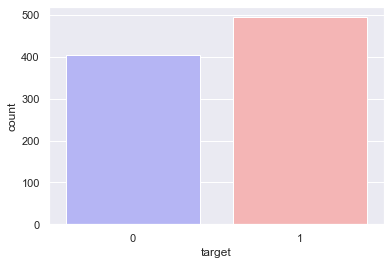

In [24]:
#plot between the count of the target values
sns.countplot(x="target", data=df_updated, palette="bwr")
plt.show()

In [25]:
#correlation with target
df_updated[df_updated.columns[1:]].corr()['target'][:]

age         0.277461
sex         0.321751
painloc     0.149308
painexer    0.183574
relrest     0.172320
              ...   
lvx2       -0.080998
lvx3       -0.027421
lvx4        0.151947
lvf        -0.034045
cathef      0.266294
Name: target, Length: 72, dtype: float64

## Feature Selection

In [26]:
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()
standardScaler.fit_transform(df_updated)

array([[ 0.00000000e+00,  1.00941842e+00,  5.14214270e-01, ...,
        -1.69274236e-01,  1.54665766e-03, -1.16518450e-01],
       [ 0.00000000e+00, -1.00529016e+00,  5.14214270e-01, ...,
        -1.69274236e-01,  1.54665766e-03, -1.24366397e-01],
       [ 0.00000000e+00,  6.91306541e-01,  5.14214270e-01, ...,
         2.45447642e+00,  6.96769276e-01, -1.23581602e-01],
       ...,
       [ 0.00000000e+00, -5.81140987e-01,  5.14214270e-01, ...,
        -1.69274236e-01,  1.54665766e-03, -4.97143901e-01],
       [ 0.00000000e+00, -6.87178281e-01, -1.94471460e+00, ...,
        -1.69274236e-01,  1.54665766e-03, -4.97143901e-01],
       [ 0.00000000e+00, -5.09545172e-02,  5.14214270e-01, ...,
        -1.69274236e-01,  1.54665766e-03, -4.97143901e-01]])

In [27]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
X = df_updated.drop(['target'],axis=1)
y = df_updated['target']

Accuracy is:  0.9722222222222222


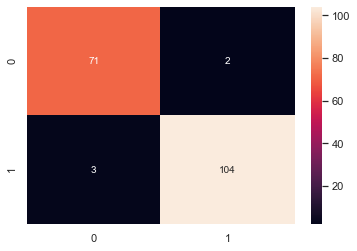

In [28]:
# split data train 80 % and test 20 %
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#random forest classifier with n_estimators=10 (default)
classifier = RandomForestClassifier(random_state=42)      
classifier = classifier.fit(x_train,y_train)

acc = accuracy_score(y_test,classifier.predict(x_test))
print('Accuracy is: ',acc)
cm = confusion_matrix(y_test,classifier.predict(x_test))
sns.heatmap(cm,annot=True,fmt="d")

In [29]:
x_train.shape

(719, 72)

In [30]:
x_test.shape

(180, 72)

## 1. Feature Importance

You can get the feature importance of each feature of your dataset by using the feature importance property of the model.

Feature importance gives you a score for each feature of your data, the higher the score more important or relevant is the feature towards your output variable.

Feature importance is an inbuilt class that comes with Tree Based Classifiers, we will be using Extra Tree Classifier for extracting the top 10 features for the dataset.

In [31]:
model = ExtraTreesClassifier()
model.fit(x_train,y_train)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [32]:
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

[0.00000000e+00 1.03529011e-02 2.42242559e-02 1.21305620e-02
 2.72215843e-02 1.93549478e-02 0.00000000e+00 4.38838283e-02
 8.67059593e-03 7.75123275e-03 8.55406601e-03 6.67890241e-03
 6.45211278e-03 6.35019821e-03 7.67362841e-03 6.49034010e-03
 9.35930651e-03 7.55446571e-03 7.57467472e-03 9.15438845e-03
 6.90775594e-03 1.96258789e-03 6.19108407e-03 7.96912826e-03
 4.64893282e-03 4.40439207e-03 9.04864144e-03 9.95795306e-03
 1.27853359e-02 1.01500631e-02 1.51433024e-02 8.26712323e-03
 7.51241592e-03 7.01222349e-03 8.84591848e-03 8.87203991e-03
 3.35379218e-02 2.44394716e-03 2.14909173e-02 2.71448123e-02
 7.01410987e-03 1.16998134e-02 1.22737635e-02 0.00000000e+00
 4.62944045e-05 1.19214686e-03 1.06447070e-03 8.78953944e-05
 5.42391239e-04 1.63808243e-02 5.92810173e-03 2.52164733e-03
 0.00000000e+00 9.21227459e-03 9.02098416e-03 8.29153938e-03
 9.94589777e-03 6.54592179e-02 5.16310637e-02 2.82674637e-02
 9.74455871e-02 2.91927510e-02 3.85210197e-02 1.95701905e-02
 6.68157469e-02 3.265114

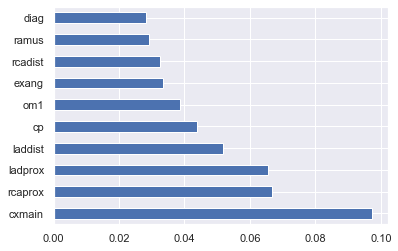

In [33]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

## 2. Recursive feature elimination (RFE) with random forest

Basically, it uses one of the classification methods (random forest in our example), assign weights to each of features. Whose absolute weights are the smallest are pruned from the current set features. That procedure is recursively repeated on the pruned set until the desired number of features.

Choosing the top 10 features using the RFE method

In [34]:
# Create the RFE object and rank each feature
classifier_1 = RandomForestClassifier(random_state = 42)      
recursiveFeatureElimination = RFE(estimator=classifier_1, n_features_to_select=10, step=1)
recursiveFeatureElimination = recursiveFeatureElimination.fit(x_train, y_train)


In [35]:
print('Chosen best 10 features by recursiveFeatureElimination:',X.columns[recursiveFeatureElimination.support_])

Chosen best 10 features by recursiveFeatureElimination: Index(['cp', 'oldpeak', 'rldv5e', 'ladprox', 'laddist', 'cxmain', 'ramus',
       'om1', 'rcaprox', 'rcadist'],
      dtype='object')


## 3. Recursive feature elimination with cross validation and random forest classification

Finding the optimal number of features using the RFE with cross validation

In [36]:
classifier_2 = RandomForestClassifier(random_state=42) 

#10-fold cross-validation
recursiveFeatureEliminationCV = RFECV(estimator=classifier_2, step=1, cv=10,scoring='accuracy')   
recursiveFeatureEliminationCV = recursiveFeatureEliminationCV.fit(x_train, y_train)

print('Optimal number of features :', recursiveFeatureEliminationCV.n_features_)
print('Best features :', X.columns[recursiveFeatureEliminationCV.support_])

Optimal number of features : 11
Best features : Index(['cp', 'thalach', 'oldpeak', 'rldv5e', 'ladprox', 'laddist', 'cxmain',
       'ramus', 'om1', 'rcaprox', 'rcadist'],
      dtype='object')


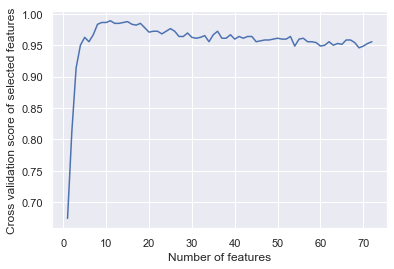

In [37]:
# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features")
plt.ylabel("Cross validation score of selected features")
plt.plot(range(1, len(recursiveFeatureEliminationCV.grid_scores_) + 1), recursiveFeatureEliminationCV.grid_scores_)
plt.show()

## 4. Tree based feature selection and random forest classification

In random forest classification method there is a featureimportances attributes that is the feature importances (the higher, the more important the feature). !!! To use feature_importance method, in training data there should not be correlated features. Random forest choose randomly at each iteration, therefore sequence of feature importance list can change.


Feature ranking:
1. feature 60 (0.108333)
2. feature 57 (0.105781)
3. feature 64 (0.087374)
4. feature 58 (0.079500)
5. feature 7 (0.039653)
6. feature 62 (0.034604)
7. feature 65 (0.030690)
8. feature 36 (0.030233)
9. feature 61 (0.028928)
10. feature 59 (0.025012)
11. feature 38 (0.024091)
12. feature 63 (0.023836)
13. feature 30 (0.022042)
14. feature 4 (0.019309)
15. feature 39 (0.016821)
16. feature 1 (0.016673)
17. feature 41 (0.014727)
18. feature 27 (0.013987)
19. feature 5 (0.013295)
20. feature 56 (0.012813)
21. feature 54 (0.011437)
22. feature 10 (0.011238)
23. feature 28 (0.011230)
24. feature 34 (0.011190)
25. feature 31 (0.011075)
26. feature 71 (0.010102)
27. feature 42 (0.009989)
28. feature 29 (0.009629)
29. feature 8 (0.009540)
30. feature 19 (0.009075)
31. feature 32 (0.008626)
32. feature 49 (0.008577)
33. feature 53 (0.008398)
34. feature 69 (0.007841)
35. feature 33 (0.007428)
36. feature 2 (0.007393)
37. feature 12 (0.007315)
38. feature 18 (0.007307)
39. featur

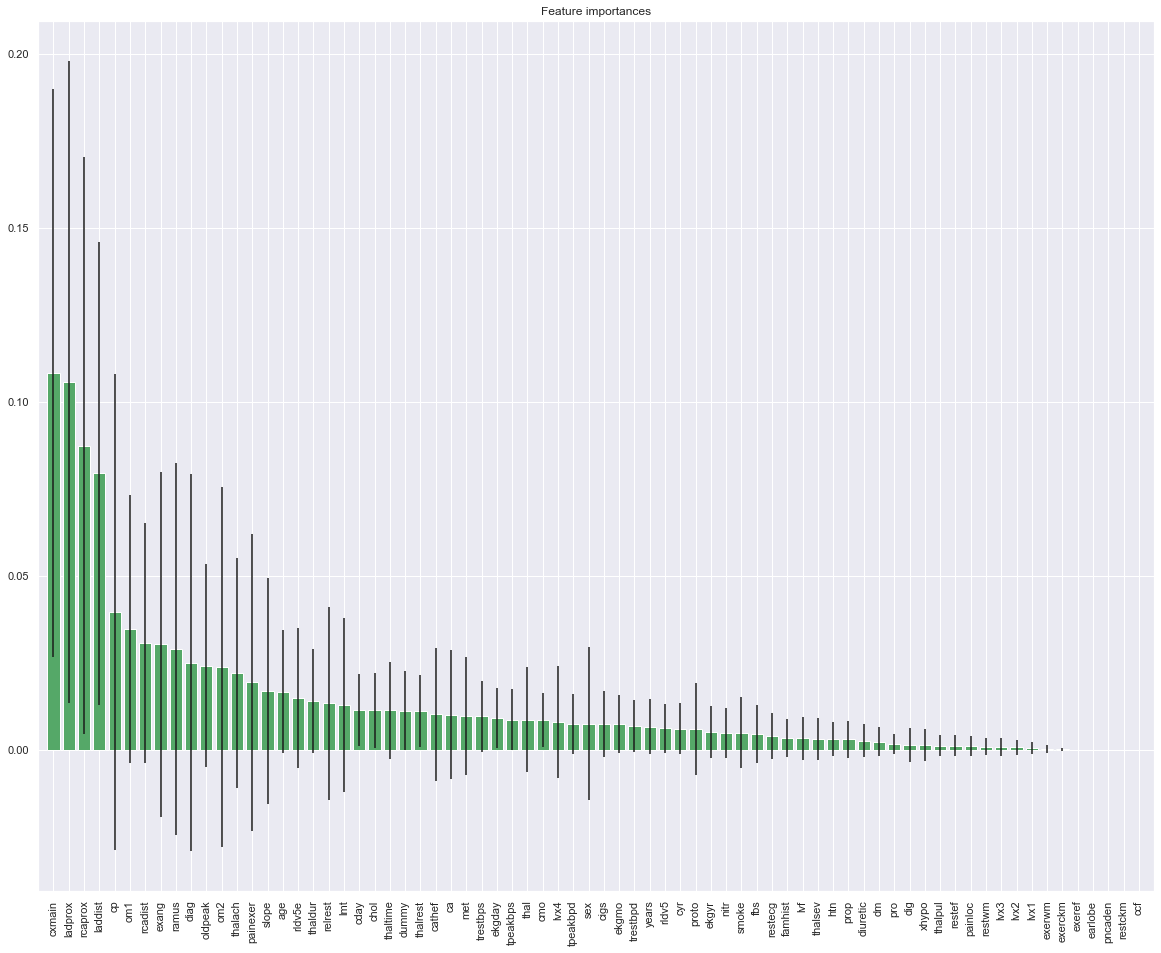

In [40]:
classifier_3 = RandomForestClassifier(random_state=42)      
classifier_3 = classifier_3.fit(x_train,y_train)
importances = classifier_3.feature_importances_
std = np.std([tree.feature_importances_ for tree in classifier.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

print("Feature ranking:")

for f in range(x_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plotting the imporant features
plt.figure(1, figsize=(20, 16))
plt.title("Feature importances")
plt.bar(range(x_train.shape[1]), importances[indices],
       color="g", yerr=std[indices], align="center")
plt.xticks(range(x_train.shape[1]), x_train.columns[indices],rotation=90)
plt.xlim([-1, x_train.shape[1]])
plt.show()

## 5. Feature Extraction

Using PCA for the feature extraction

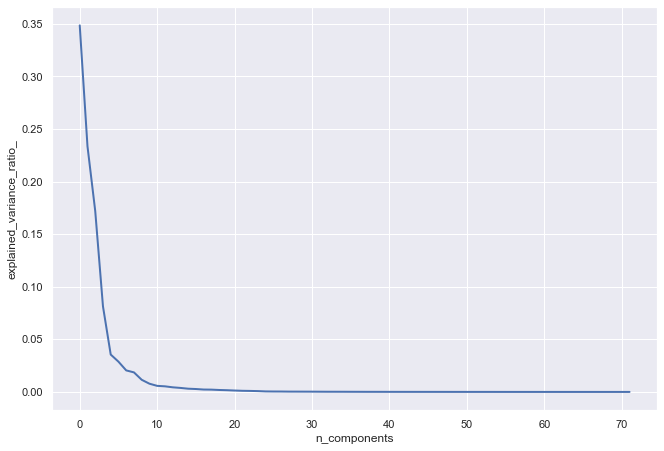

In [41]:
pca = PCA()
pca.fit(x_train)

plt.figure(1, figsize=(12, 8))
plt.clf()
plt.axes([.2, .2, .7, .7])
plt.plot(pca.explained_variance_ratio_, linewidth=2)
plt.axis('tight')
plt.xlabel('n_components')
plt.ylabel('explained_variance_ratio_')
plt.show()


### According to variance ratio, 2 components can be chosen.

In [42]:
pca_q = KernelPCA(n_components=2,kernel='poly')
X_train_pca_q = pca_q.fit_transform(x_train)
X_test_pca_q= pca_q.transform(x_test)

In [43]:
X_train_pca_q.shape

(719, 2)

In [44]:
y_train.shape

(719,)

In [45]:
X_test_pca_q.shape

(180, 2)

In [46]:
y_test.shape

(180,)

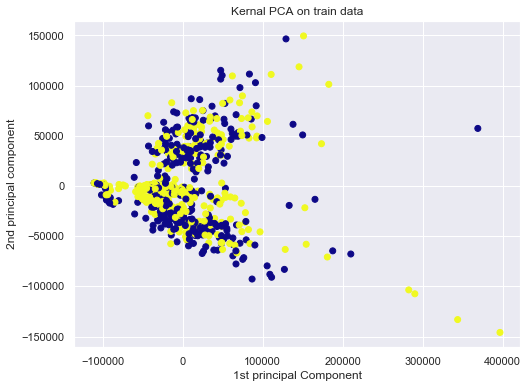

In [47]:
plt.figure(figsize=(8,6))
plt.scatter(X_train_pca_q[:,0],X_train_pca_q[:,1], c=y_train,cmap='plasma')
plt.xlabel('1st principal Component')
plt.ylabel('2nd principal component')
plt.title('Kernal PCA on train data')
plt.show()

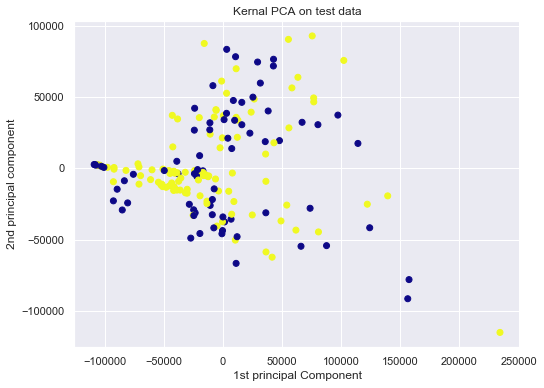

In [48]:
plt.figure(figsize=(8,6))
plt.scatter(X_test_pca_q[:,0],X_test_pca_q[:,1], c=y_test,cmap='plasma')
plt.xlabel('1st principal Component')
plt.ylabel('2nd principal component')
plt.title('Kernal PCA on test data')
plt.show()

In [49]:
# t-SNE
tsne = TSNE(n_components=2)
tsne_train = tsne.fit_transform(x_train)
tsne_test = tsne.fit_transform(x_test)
tsne_train.shape

(719, 2)

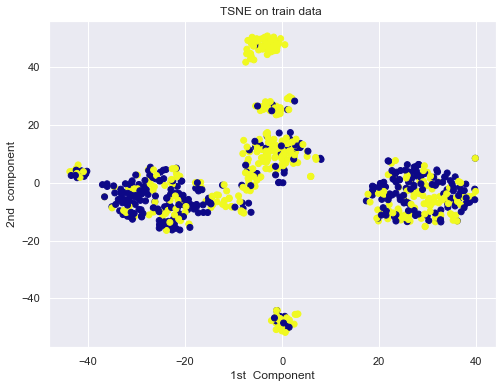

In [50]:
plt.figure(figsize=(8,6))
plt.scatter(tsne_train[:,0],tsne_train[:,1], c=y_train,cmap='plasma')
plt.xlabel('1st  Component')
plt.ylabel('2nd  component')
plt.title('TSNE on train data ')
plt.show()

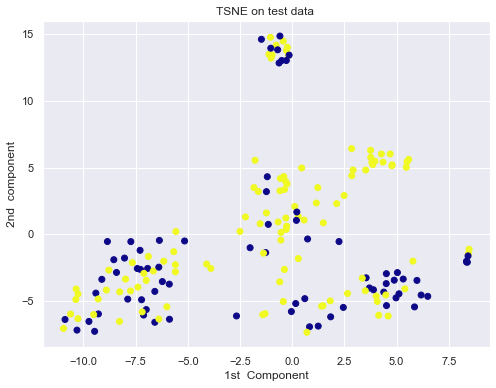

In [51]:
plt.figure(figsize=(8,6))
plt.scatter(tsne_test[:,0],tsne_test[:,1], c=y_test,cmap='plasma')
plt.xlabel('1st  Component')
plt.ylabel('2nd  component')
plt.title('TSNE on test data ')
plt.show()

## Using the selected features and analysing the data

In [52]:
# Selecting few important features from all the above analysis
data = df_updated[['cp', 'thalach', 'oldpeak', 'rldv5e', 'ladprox', 'laddist', 'cxmain',
       'ramus', 'om1', 'rcaprox', 'rcadist','age','sex','chol','target']] 

In [53]:
data.head()

,cp,thalach,oldpeak,rldv5e,ladprox,laddist,cxmain,ramus,om1,rcaprox,rcadist,age,sex,chol,target
0,4,112,3.0,19,1,2,1,1,1,2,1,63,1,260.0,1
1,4,127,0.0,-9,1,1,1,1,1,1,1,44,1,209.0,0
2,4,140,1.5,20,1,1,2,1,2,2,1,60,1,218.0,1
3,4,149,2.5,12,1,1,2,1,1,1,1,55,1,228.0,1
4,3,99,1.3,16,1,1,1,1,1,1,1,66,1,213.0,0


In [54]:
data.shape

(899, 15)

## Correlation map for the selected features

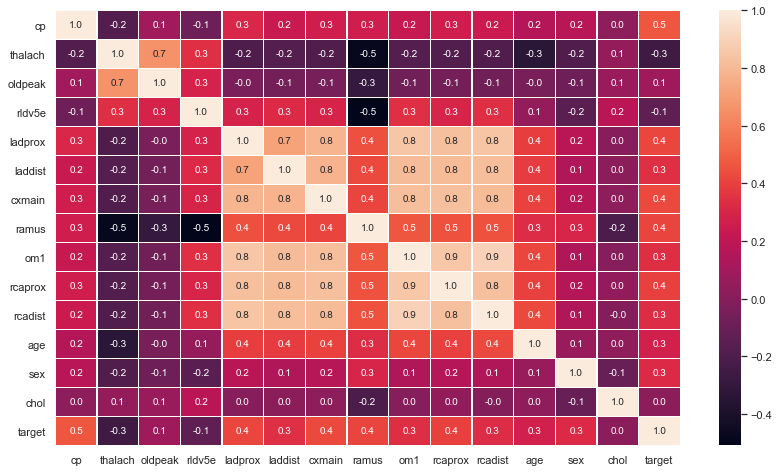

In [55]:
cmat = data.corr()
#correlation map
f,ax = plt.subplots(figsize=(14, 8))
sns.heatmap(cmat, annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

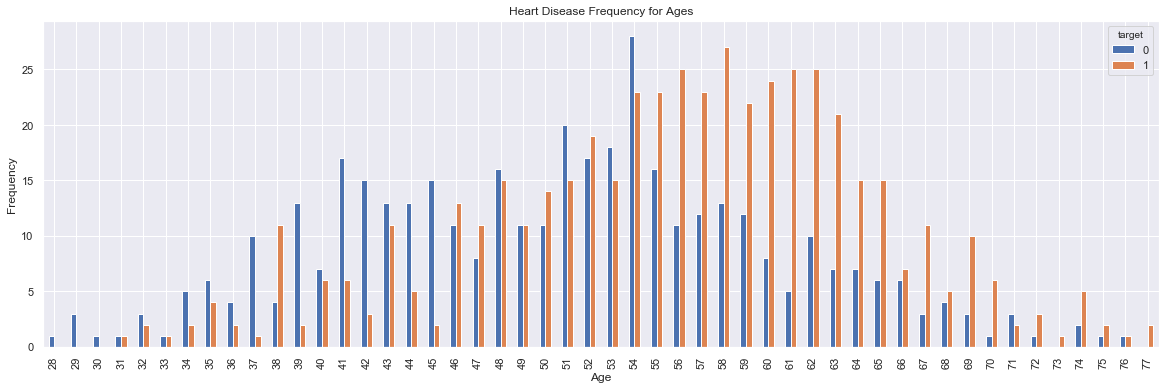

In [56]:
#Plot between age and target
pd.crosstab(data.age,data.target).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

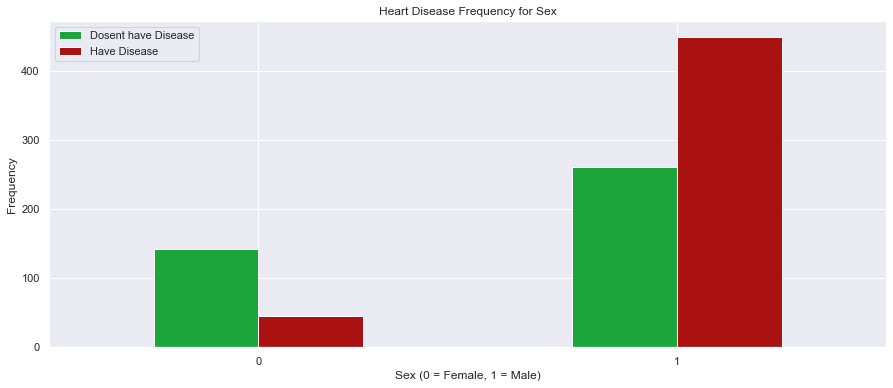

In [57]:
pd.crosstab(data.sex,data.target).plot(kind="bar",figsize=(15,6),color=['#1CA53B','#AA1111' ])
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Dosent have Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

In [58]:
# splitting the data set with 80% train_validation and 20% test
Xt = data.iloc[:,0:14]
yt = data.iloc[:,14]
Xt_train,Xt_test,yt_train,yt_test = train_test_split(Xt,yt,test_size=0.2,random_state=42)

In [59]:
Xt.head()

,cp,thalach,oldpeak,rldv5e,ladprox,laddist,cxmain,ramus,om1,rcaprox,rcadist,age,sex,chol
0,4,112,3.0,19,1,2,1,1,1,2,1,63,1,260.0
1,4,127,0.0,-9,1,1,1,1,1,1,1,44,1,209.0
2,4,140,1.5,20,1,1,2,1,2,2,1,60,1,218.0
3,4,149,2.5,12,1,1,2,1,1,1,1,55,1,228.0
4,3,99,1.3,16,1,1,1,1,1,1,1,66,1,213.0


In [60]:
#Feature scaling
scaling = StandardScaler()
X_train = scaling.fit_transform(Xt_train)
X_test = scaling.transform(Xt_test)

In [65]:
rf = RandomForestClassifier(n_estimators=100,random_state=42)
scores = cross_val_score(rf, Xt, yt, cv=10)
print("Accuracy for 10 reputaions: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy for 10 reputaions: 0.97 (+/- 0.12)


The accuracy of Random Forest Classifier is 0.9833333333333333
[[ 73   0]
 [  3 104]]
The accuracy  0.9833333333333333
Precision: 1.0
Recall: 0.9719626168224299
Fscore: 0.985781990521327


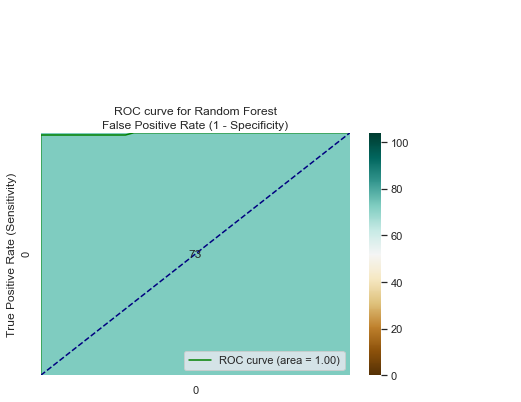

In [66]:
#Random Forest 

rf = RandomForestClassifier(n_estimators=100,random_state=42)

rf.fit(Xt_train,yt_train)
rf_pred = rf.predict(Xt_test)


cm = confusion_matrix(yt_test,rf_pred)
print('The accuracy of Random Forest Classifier is',metrics.accuracy_score(rf_pred,yt_test))
print(cm)

cnf_matrix = metrics.confusion_matrix(yt_test, rf_pred)
cnf_matrix
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="BrBG" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
print('The accuracy ',metrics.accuracy_score(rf_pred,yt_test))
print("Precision:",metrics.precision_score(yt_test, rf_pred))
print("Recall:",metrics.recall_score(yt_test, rf_pred))
print("Fscore:",metrics.f1_score(yt_test,rf_pred))
yt_pred_proba = rf.predict_proba(Xt_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(yt_test,  yt_pred_proba)

auc = metrics.roc_auc_score(yt_test, yt_pred_proba)
plt.plot(fpr, tpr, color='green', label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12         
plt.title('ROC curve for Random Forest')        
plt.xlabel('False Positive Rate (1 - Specificity)')        
plt.ylabel('True Positive Rate (Sensitivity)')        
plt.legend(loc="lower right")        
plt.show() 

The accuracy  0.6722222222222223
Precision: 0.7553191489361702
Recall: 0.6635514018691588
Fscore: 0.7064676616915424


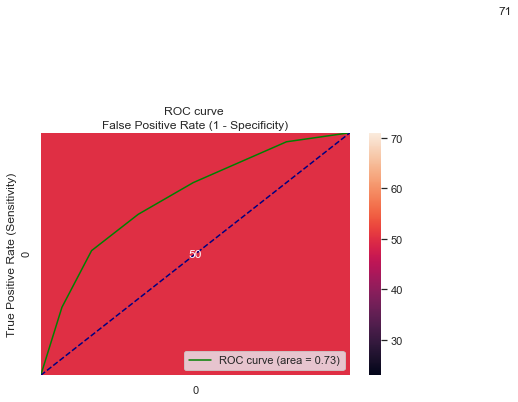

The accuracy  0.9666666666666667
Precision: 0.9719626168224299
Recall: 0.9719626168224299
Fscore: 0.9719626168224299


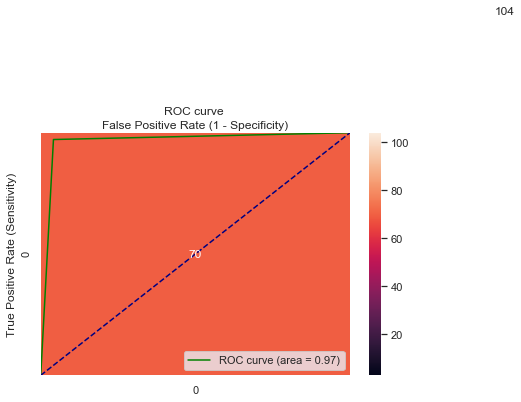

The accuracy  0.7
Precision: 0.7264957264957265
Recall: 0.794392523364486
Fscore: 0.7589285714285715


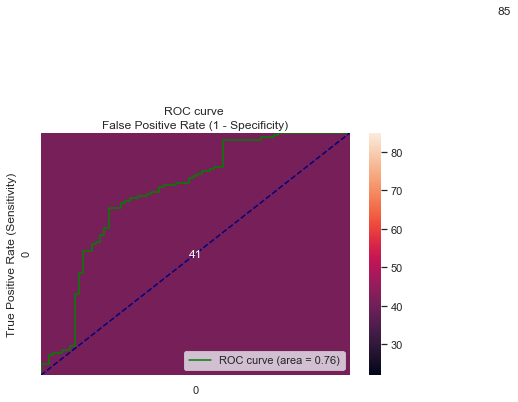

,Accuracy
KNN,0.672222
Decision Tree,0.966667
Naive Bayes,0.700000


In [63]:
#All classifier model accuracies
abc=[]
classifiers=['KNN','Decision Tree','Naive Bayes']
models=[KNeighborsClassifier(n_neighbors=5),DecisionTreeClassifier(),GaussianNB()]
for i in models:
    model = i
    model.fit(Xt_train,yt_train)
    yt_pred=model.predict(Xt_test)
    abc.append(metrics.accuracy_score(yt_pred,yt_test))
    cnf_matrix = metrics.confusion_matrix(yt_test, yt_pred)
    cnf_matrix
    class_names=[0,1] # name  of classes
    fig, ax = plt.subplots()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)
    sns.heatmap(pd.DataFrame(cnf_matrix), annot=True ,fmt='g')
    ax.xaxis.set_label_position("top")
    plt.tight_layout()
    plt.title('Confusion matrix', y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    print('The accuracy ',metrics.accuracy_score(yt_pred,yt_test))
    print("Precision:",metrics.precision_score(yt_test, yt_pred))
    print("Recall:",metrics.recall_score(yt_test, yt_pred))
    print("Fscore:",metrics.f1_score(yt_test,yt_pred))
    yt_pred_proba = model.predict_proba(Xt_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(yt_test,  yt_pred_proba)

    auc = metrics.roc_auc_score(yt_test, yt_pred_proba)
    plt.plot(fpr, tpr, color='green', label='ROC curve (area = %0.2f)' % auc)
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.rcParams['font.size'] = 12         
    plt.title('ROC curve ')        
    plt.xlabel('False Positive Rate (1 - Specificity)')        
    plt.ylabel('True Positive Rate (Sensitivity)')        
    plt.legend(loc="lower right")        
    plt.show() 
models_dataframe=pd.DataFrame(abc,index=classifiers)   
models_dataframe.columns=['Accuracy']
models_dataframe

## AdaBoostClassifier

In [67]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import LabelEncoder

model = DecisionTreeClassifier(criterion='entropy',max_depth=1)
AdaBoost = AdaBoostClassifier(base_estimator=model,n_estimators=400,learning_rate=1)
bestmodel = AdaBoost.fit(X_train,yt_train)

pred = bestmodel.predict(X_test)

accuracy = metrics.accuracy_score(yt_test,pred)


print('The accuracy is:', accuracy*100, '%')


The accuracy is: 98.33333333333333 %
